<a href="https://colab.research.google.com/github/suzannelittle/dcu-dmv/blob/main/NamesTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template to get started exploring names datasets
Suzanne Little    
suzanne.little@dcu.ie    
https://github.com/DiversityInData/Python-Workshops/tree/master/Visualisation    

In [1]:
# get the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Load the US Baby Names dataset

In [2]:
usn = pd.read_csv("https://raw.githubusercontent.com/suzannelittle/Python-Workshops/master/Visualisation/datasets/usnames.csv")

# NOTE: see also the much smaller UK, Irish, Australia (New South Wales) and France baby names datasets - https://github.com/suzannelittle/Python-Workshops/tree/master/Visualisation/datasets
#usn = pd.read_csv("https://raw.githubusercontent.com/suzannelittle/Python-Workshops/master/Visualisation/datasets/irishnames.csv")
#usn = pd.read_csv("https://raw.githubusercontent.com/suzannelittle/Python-Workshops/master/Visualisation/datasets/nswbabynames.csv")
#usn = pd.read_csv("https://raw.githubusercontent.com/suzannelittle/Python-Workshops/master/Visualisation/datasets/uknames.csv")
#usn = pd.read_csv("https://raw.githubusercontent.com/suzannelittle/Python-Workshops/refs/heads/master/Visualisation/datasets/frenchnames.csv")  # check column names!
usn.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [3]:
usn.describe()

,births,year
count,2.117219e+06,2.117219e+06
mean,1.741134e+02,1.978991e+03
std,1.473001e+03,3.499572e+01
min,5.000000e+00,1.880000e+03
25%,7.000000e+00,1.956000e+03
50%,1.200000e+01,1.989000e+03
75%,3.200000e+01,2.007000e+03
max,9.969300e+04,2.023000e+03


In [4]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
usn = usn.groupby(['year', 'sex'], group_keys=False).apply(add_prop)

<ipython-input-4-1fec30bb2708>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  usn = usn.groupby(['year', 'sex'], group_keys=False).apply(add_prop)


In [5]:
usn.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [6]:
myname = usn[(usn.name == "Suzanne") & (usn.sex == "F")]
myname.describe()

,births,year,prop
count,143.000000,143.000000,143.000000
mean,1532.559441,1951.979021,0.000951
std,2059.552593,41.460565,0.001156
min,5.000000,1880.000000,0.000027
25%,63.500000,1916.500000,0.000065
50%,376.000000,1952.000000,0.000278
75%,2355.000000,1987.500000,0.001738
max,6854.000000,2023.000000,0.003785


<Axes: title={'center': 'Popularity of Suzanne as name in US'}, xlabel='year'>

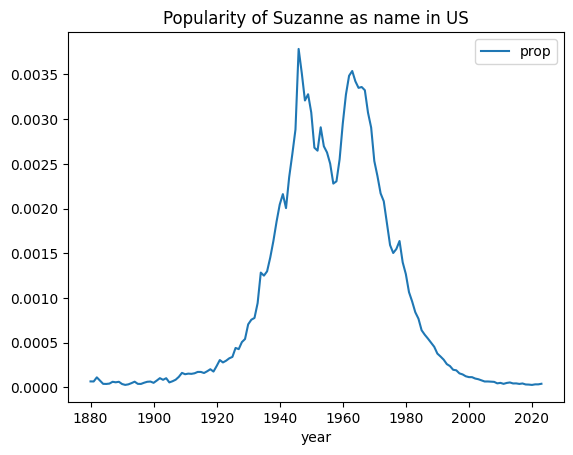

In [7]:
myname.plot(x='year', y='prop', title="Popularity of Suzanne as name in US")

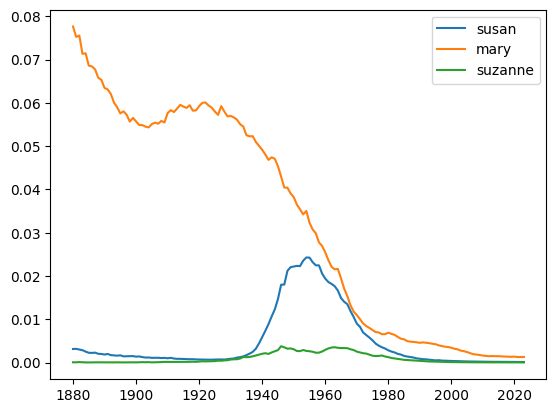

In [8]:
susan = usn[(usn.name == "Susan") & (usn.sex == "F")][['year', 'prop']]
mary = usn[(usn.name == "Mary") & (usn.sex == "F")][['year', 'prop']]
plt.plot(susan.year, susan.prop, label="susan")
plt.plot(mary.year, mary.prop, label="mary")
plt.plot(myname.year, myname.prop, label="suzanne")
plt.legend(loc='upper right')
plt.show()

## Pop culture influence

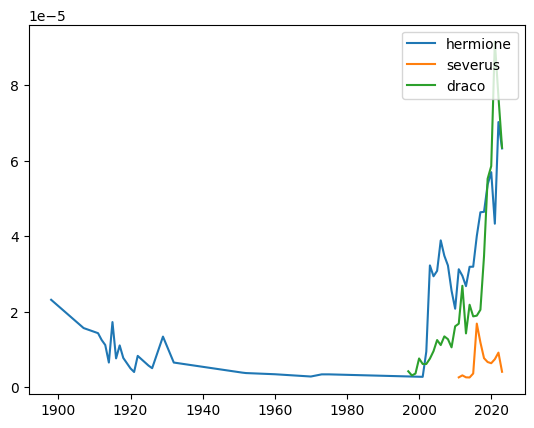

In [9]:
hp = usn[(usn.name == "Harry") & (usn.sex == "M")]
hg = usn[(usn.name == "Hermione") & (usn.sex == "F")]
ss = usn[(usn.name == "Severus") & (usn.sex == "M")]
dm = usn[(usn.name == "Draco") & (usn.sex == "M")]
#plt.plot(hp.year, hp.prop, label="harry")
plt.plot(hg.year, hg.prop, label="hermione")
plt.plot(ss.year, ss.prop, label="severus")
plt.plot(dm.year, dm.prop, label="draco")
plt.legend(loc='upper right')
plt.show()